# Neural Networks for Age Prediction in Abalones in Biology

Models used:

<ol start="1">
<li>Model 1: only with three dense layers</li>
<li>Model 2: only with dense layers of depth twice Model 1</li>
<li>Model 3: 
  <ul style="list-style-type: decimal;">
    <li>with dense layers of depth twice Model 1</li>
    <li>with a dropout and a normalisation layer after each dense layer</li>
  </ul>
<li>Model 4: </li>
</li>
  <ul style="list-style-type: decimal;">
    <li>with more layers that Model 3</li>
    <li>with several dense layers with decreasing depth</li>
    <li>with dropout and normalisation layers</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from utils import nn_model1, nn_model2, nn_model3, nn_model4, helper

## 1. EDA (Reading, Cleaning and Inspecting Data)

In [4]:
df = pd.read_csv('abalone.csv')

In [6]:
df = df.dropna()

In [8]:
display(df)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [10]:
df.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
# we drop the first column w non-numerical values for simplicity
df = df.drop(columns='Type')
df

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. Splitting Data

In [15]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 3. Training with Neural Network Models

## 3.1. Model 1: only with three dense layers

In [21]:
model1 = nn_model1.NeuralNetworkModel1(input_shape=7)
model1.compile_model1()
model1.summary1()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,857 (101.00 KB)

 Trainable params: 25,857 (101.00 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "min",
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)


history1 = model1.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3209 - mae: 9.4513 - val_loss: 2.3311 - val_mae: 8.6281
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8160 - mae: 7.9268 - val_loss: 0.6352 - val_mae: 5.8339
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4477 - mae: 4.8344 - val_loss: 0.1022 - val_mae: 2.5371
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0807 - mae: 2.3774 - val_loss: 0.0738 - val_mae: 2.7149
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0775 - mae: 2.8034 - val_loss: 0.0727 - val_mae: 2.7027
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0712 - mae: 2.6551 - val_loss: 0.0616 - val_mae: 2.3515
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0624 - mae: 2.2954 - val_loss: 0.0576 - val_mae: 2.2104
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0579 - mae: 2.1792 - val_loss: 0.0543 - val_mae: 2.1503
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.053

min validation msle: 0.034475184977054596


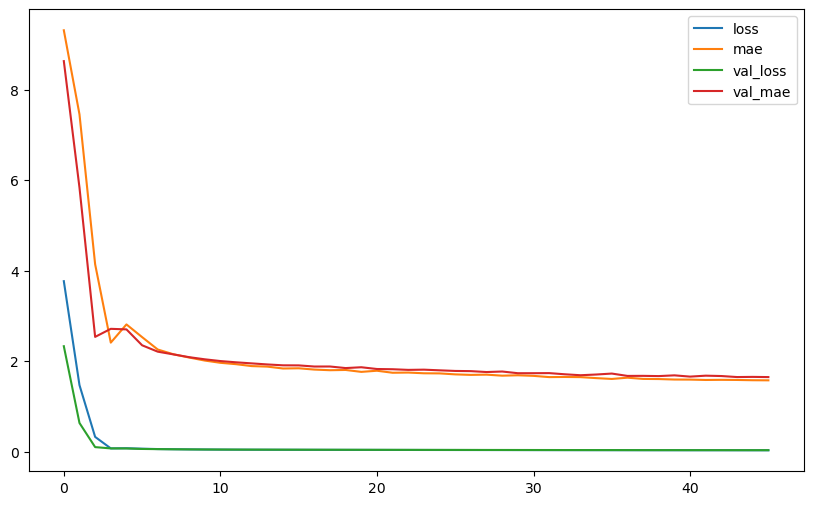

In [25]:
history_df1 = pd.DataFrame(history1.history)
history_df1.plot(figsize=(10,6))

print("min validation msle: {}".format(history_df1['val_loss'].min()))

## 3.2. Model 2: only with dense layers of depth twice model1

In [28]:
model2 = nn_model2.NeuralNetworkModel2(input_shape=7)
model2.compile_model2()
model2.summary2()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,921 (2.02 MB)

 Trainable params: 529,921 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "min",
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)


history2 = model2.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3448 - mae: 8.5860 - val_loss: 0.0697 - val_mae: 2.4030
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1560 - mae: 4.3273 - val_loss: 0.2338 - val_mae: 5.9816
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1667 - mae: 4.6098 - val_loss: 0.0746 - val_mae: 2.3372
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0819 - mae: 2.3601 - val_loss: 0.0636 - val_mae: 2.2237
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593 - mae: 2.1914 - val_loss: 0.0553 - val_mae: 2.2424
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0520 - mae: 2.1121 - val_loss: 0.0486 - val_mae: 1.9727
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0457 - mae: 1.8845 - val_loss: 0.0459 - val_mae: 1.9153
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - mae: 1.8486 - val_loss: 0.0450 - val_mae: 1.8819
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.042

min validation msle: 0.03230922669172287


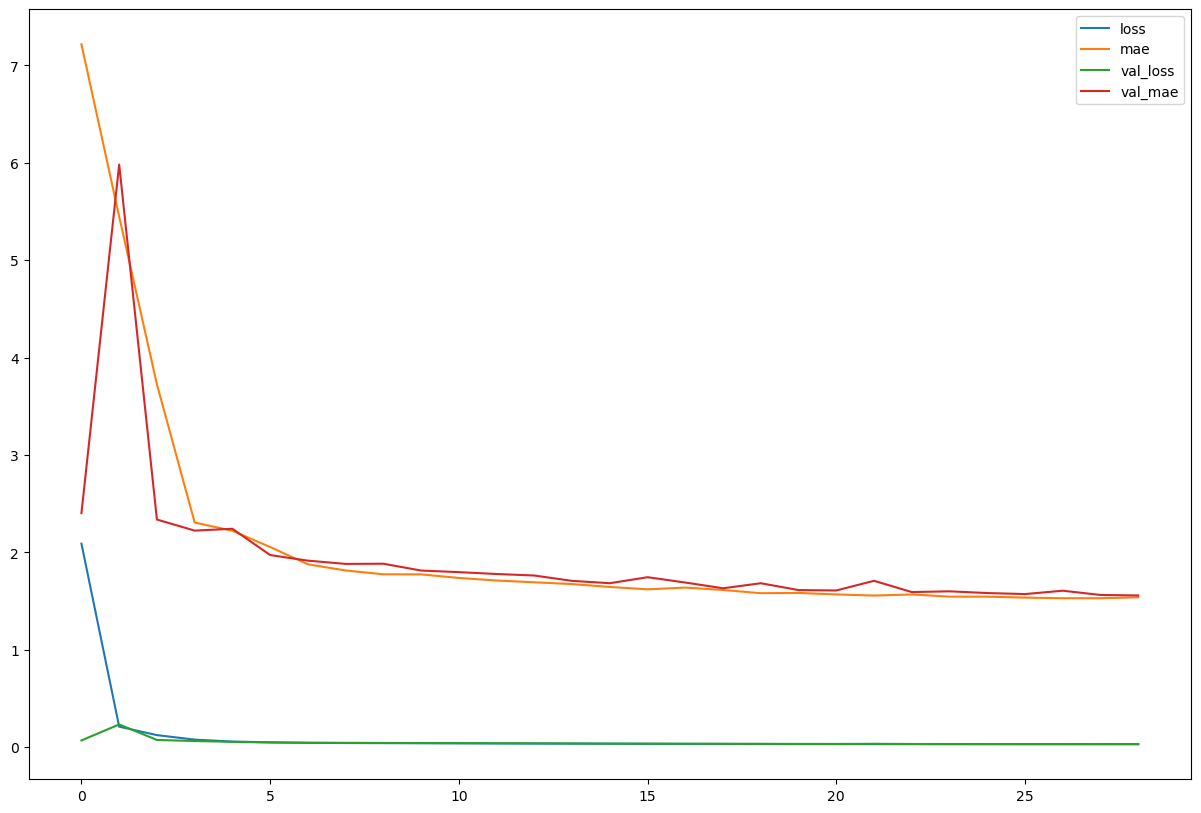

In [32]:
history_df2 = pd.DataFrame(history2.history)
history_df2.plot(figsize=(15,10))
print("min validation msle: {}".format(history_df2['val_loss'].min()))

## 3.3. Model 3: with dense layers of depth twice model1, and Dropout and Normalisation after each dense layer

In [35]:
model3 = nn_model3.NeuralNetworkModel3(input_shape=7)
model3.compile_model3()
model3.summary3()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,170,305 (12.09 MB)

 Trainable params: 3,164,161 (12.07 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [37]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "min",
    min_delta=0.001,
    patience=5,
    restore_best_weights=True,
)


history3 = model3.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.0960 - mae: 10.2664 - val_loss: 4.7111 - val_mae: 12.2572
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.4287 - mae: 10.3639 - val_loss: 1.1366 - val_mae: 6.7203
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0831 - mae: 9.6188 - val_loss: 0.3331 - val_mae: 4.4417
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8138 - mae: 9.4189 - val_loss: 0.2693 - val_mae: 4.2807
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6332 - mae: 8.8250 - val_loss: 0.1848 - val_mae: 3.6092
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4641 - mae: 8.3944 - val_loss: 0.1278 - val_mae: 3.0020
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4428 - mae: 8.3833 - val_loss: 0.0922 - val_mae: 2.5503
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3780 - mae: 8.0812 - val_loss: 0.0929 - val_mae: 2.6285
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step -

min validation msle: 0.09217211604118347


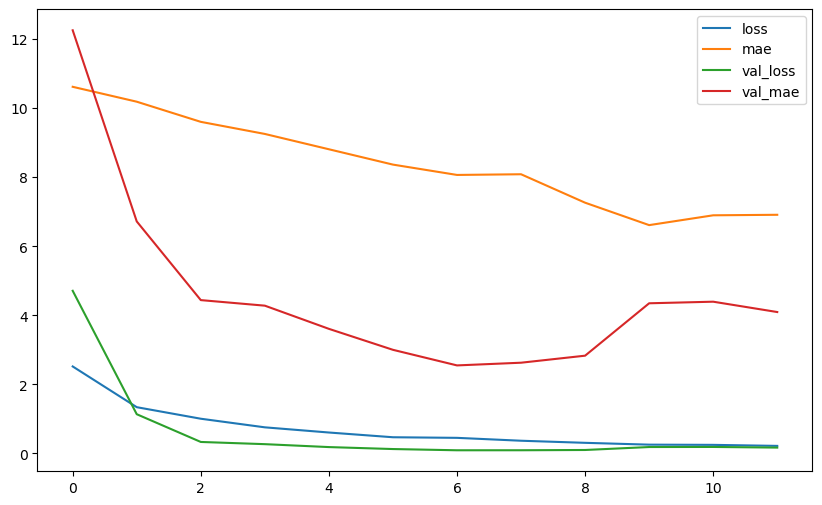

In [39]:
history_df3 = pd.DataFrame(history3.history)
history_df3.plot(figsize=(10,6))
print("min validation msle: {}".format(history_df3['val_loss'].min()))

## 3.4. Model 4: with several dense layers as well as dropout and normalisations, more than Model 3

In [42]:
model4 = nn_model4.NeuralNetworkModel4()
model4.compile_model4()
model4.summary4()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,351 (1.46 MB)

 Trainable params: 381,831 (1.46 MB)

 Non-trainable params: 1,520 (5.94 KB)

In [44]:
# Fitting with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    monitor = "val_loss",
    mode = "min",
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)


history4 = model4.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.8503 - mae: 9.8231 - val_loss: 5.4462 - val_mae: 9.9831
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0810 - mae: 9.6404 - val_loss: 5.2570 - val_mae: 9.9449
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7566 - mae: 9.5915 - val_loss: 5.0546 - val_mae: 9.9103
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5286 - mae: 9.4573 - val_loss: 4.7373 - val_mae: 9.8338
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3574 - mae: 9.4449 - val_loss: 4.6095 - val_mae: 9.8198
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1701 - mae: 9.1735 - val_loss: 4.4871 - val_mae: 9.8089
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0462 - mae: 9.1876 - val_loss: 4.1332 - val_mae: 9.6792
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8821 - mae: 9.0095 - val_loss: 3.4246 - val_mae: 9.3374
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.72

min validation msle: 0.059092581272125244


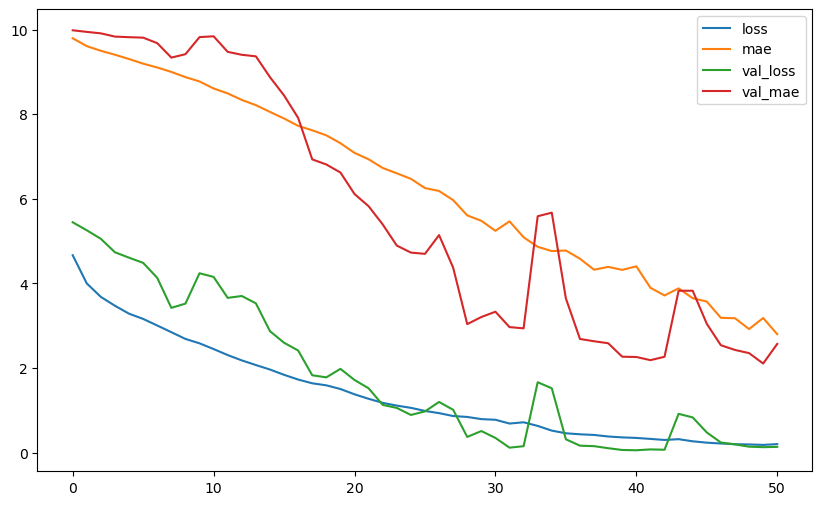

In [46]:
history_df4 = pd.DataFrame(history4.history)
history_df4.plot(figsize=(10,6))
print("min validation msle: {}".format(history_df4['val_loss'].min()))

## Conclusion.
Simple neural networks with few layers work as good as (or even better than) complex neural networks with more layers and deeper layers. So regression is a good choice for the problem of this project.